In [2]:
import pandas as pd
import plotly.express as px
from scipy.stats import chi2_contingency
import numpy as np

In [56]:
df = pd.read_excel("data/Telco_customer_churn_adapted_v2.xlsx")
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [90]:
products = ["Games Product", "Music Product", "Education Product", "Video Product", "Call Center", "Use MyApp", "Device Class"]

In [ ]:
idx = 1 

# Menghitung "Count" untuk setiap kategori
temp = df[[products[idx], "Churn Label", "Customer ID"]].groupby([products[idx], "Churn Label"]).count().reset_index()
temp.columns = [products[idx], "Churn Label", "Count"]

# Menghitung total "Count" untuk setiap kategori produk
total_count = temp.groupby(products[idx])["Count"].sum()
temp["Percentage"] = (temp["Count"] / temp[products[idx]].map(total_count)) * 100

# Plot dengan sumbu y "Count"
fig_count = px.bar(temp, x=products[idx], y="Count", color="Churn Label", barmode="group",
                   title=f"Jumlah Customer Churn dan Tidak Churn berdasarkan {products[idx]}")
fig_count.show()

# Plot dengan sumbu y "Percentage"
fig_percentage = px.bar(temp, x=products[idx], y="Percentage", color="Churn Label", barmode="group",
                        title=f"Persentase Customer Churn dan Tidak Churn berdasarkan {products[idx]}")
fig_percentage.show()

observed = pd.crosstab(df[products[idx]], df["Churn Label"])
chi2, p, dof, expected = chi2_contingency(observed)

if p < 0.05:
    print(f"Terdapat hubungan yang signifikan antara {products[idx]} dan Churn.")
else:
    print(f"Tidak terdapat hubungan yang signifikan antara {products[idx]} dan Churn.")


In [82]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(cross_tabs):
    """
    Prints the degrees of freedom, effect size thresholds, Cramer's V value, and interpretation.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    
    # Effect size data frame for Cramer's V function
    data = np.array([[1, .1, .3, .5],
       [2, .07, .21, .35],
       [3, .06, .17, .29],
       [4, .05, .15, .25],
       [5, .04, .13, .22]])
    sizes = pd.DataFrame(data, columns=['Degrees of Freedom', 'Small Effect', 'Medium Effect', 'Large Effect']) 
    
    # Getting the chi-squared stat
    chi2 = chi2_contingency(cross_tabs)[0]
    # Calculating the total number of observations
    n = cross_tabs.sum().sum()
    # Getting the degrees of freedom
    dof = min(cross_tabs.shape) - 1
    # Calculating Cramer's V
    v = np.sqrt(chi2 / (n * dof))
    
    # Interpreting the effect size
    effect_size = "Small Effect"
    for i, row in sizes.iterrows():
        print(row)
        if dof == row["Degrees of Freedom"]:
            if v > row["Small Effect"] and v <= row["Medium Effect"]:
                effect_size = "Small Effect"
            elif v > row["Medium Effect"] and v <= row["Large Effect"]:
                effect_size = "Medium Effect"
            else:
                effect_size = "Large Effect"
            break

    # Printing results
    print(f'V = {v}')
    print(f'Cramer\'s V Degrees of Freedom = {dof}')
    print(f'Effect Size Interpretation: {effect_size}')
    # print(f'\nEffect Size Thresholds\n{sizes}\n')


In [ ]:
observed = pd.crosstab(df["Games Product"], df["Churn Label"])
cramers_v(observed)

In [ ]:
# Effect size data frame for Cramer's V function
data = np.array([[1, .1, .3, .5],
    [2, .07, .21, .35],
    [3, .06, .17, .29],
    [4, .05, .15, .25],
    [5, .04, .13, .22]])
sizes = pd.DataFrame(data, columns=['Degrees of Freedom', 'Small Effect', 'Medium Effect', 'Large Effect']) 
sizes

In [ ]:
for i in range(len(products)):
    print(products[i])
    observed = pd.crosstab(df[products[i]], df["Churn Label"])
    cramers_v(observed)
    print()

In [93]:
def products_figure(product, percentage, dependent="Churn Label"):
    # Menghitung "Count" untuk setiap kategori
    temp = df[[product, "Churn Label", "Customer ID"]].groupby([product, "Churn Label"]).count().reset_index()
    temp.columns = [product, "Churn Label", "Count"]

    # Menghitung total "Count" untuk setiap kategori produk
    total_count = temp.groupby(product)["Count"].sum()
    temp["Percentage"] = (temp["Count"] / temp[product].map(total_count)) * 100

    # Plot dengan sumbu y "Count"
    y = "Percentage" if percentage else "Count"
    fig = px.bar(temp, x=product, y=y, color="Churn Label", barmode="group",
                 title=f"Jumlah Customer Churn dan Tidak Churn berdasarkan {product}")

    return fig

In [104]:
def chi2_test(product):
    observed = pd.crosstab(df[product], df["Churn Label"])
    chi2, p, dof, expected = chi2_contingency(observed)

    if p < 0.05:
        conclusion = f"Terdapat hubungan yang signifikan antara {product} dan Churn."
    else:
        conclusion = f"Tidak terdapat hubungan yang signifikan antara {product} dan Churn." 

    output = pd.DataFrame({
        "chi2" : [round(chi2, 2)],
        "p-value" : [round(p, 3)],
        "degrees of freedom" : [dof],
        "conclusion" : [conclusion]
    })

    return output

In [110]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(product):
    cross_tabs = pd.crosstab(df[product], df["Churn Label"])

    chi2 = chi2_contingency(cross_tabs)[0]
    n = cross_tabs.sum().sum()
    dof = min(cross_tabs.shape) - 1
    v = np.sqrt(chi2 / (n * dof))
    
    # Interpreting the effect size
    effect_size = "Small Effect"
    for i, row in sizes.iterrows():
        if dof == row["Degrees of Freedom"]:
            if v > row["Small Effect"] and v <= row["Medium Effect"]:
                effect_size = "Small Effect"
            elif v > row["Medium Effect"] and v <= row["Large Effect"]:
                effect_size = "Medium Effect"
            else:
                effect_size = "Large Effect"
            break

    output = pd.DataFrame({
        "V" : [round(v, 3)],
        "Cramer's V Degrees of Freedom" : [dof],
        "Effect Size" : [effect_size]
    })
    return output


cramers_v(products[0])

,V,Cramer's V Degrees of Freedom,Effect Size
0,0.347,1,Medium Effect


In [112]:
print(df[["Games Product", "CLTV (Predicted Thou. IDR)"]])

            Games Product  CLTV (Predicted Thou. IDR)
0                     Yes                      4210.7
1                      No                      3511.3
2                      No                      6983.6
3                      No                      6503.9
4                      No                      6942.0
...                   ...                         ...
7038  No internet service                      6897.8
7039                  Yes                      2782.0
7040                   No                      7228.0
7041                  Yes                      3630.9
7042                  Yes                      6626.1

[7043 rows x 2 columns]


In [11]:
temp = df[["Games Product", "CLTV (Predicted Thou. IDR)"]]
temp.groupby("Games Product").count()

,CLTV (Predicted Thou. IDR)
Games Product,
No,3498
No internet service,1526
Yes,2019


In [ ]:
temp = df[["Games Product", "CLTV (Predicted Thou. IDR)"]]

import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway()
print(fvalue, pvalue)

In [6]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [ ]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [12]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Buat beberapa contoh data untuk tiga kelompok
group1 = [68, 72, 65, 74, 70]
group2 = [58, 63, 60, 62, 59]
group3 = [78, 83, 80, 85, 82]

# Gabungkan data ke dalam satu array
data = np.concatenate([group1, group2, group3])

# Buat label kelompok yang sesuai
labels = ['Group 1'] * len(group1) + ['Group 2'] * len(group2) + ['Group 3'] * len(group3)

# Lakukan One-Way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Lakukan juga menggunakan statsmodels untuk mendapatkan lebih banyak informasi
df = sm.stats.anova_lm(ols('data ~ C(labels)', data={'data': data, 'labels': labels}).fit())
print(df)

F-statistic: 71.11764705882366
p-value: 2.2181191966453334e-07
             df  sum_sq     mean_sq          F        PR(>F)
C(labels)   2.0  1128.4  564.200000  71.117647  2.218119e-07
Residual   12.0    95.2    7.933333        NaN           NaN


In [58]:
product = "Video Product"
cltv = "CLTV (Predicted Thou. IDR)"

groups = dict()
labels = list()
for key in df[product].unique():
    groups[key] = df[df[product] == key][cltv].values
    labels.extend([key]*len(groups[key]))
data = np.concatenate(list(groups.values()))

f_statistic, p_value = stats.f_oneway(*groups.values())

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 43.6351187623681
p-value: 1.4655657594444916e-19


In [59]:
# Buat model ANOVA dengan statsmodels
model = ols('data ~ C(labels)', data={'data': data, 'labels': labels}).fit()

# Lakukan uji post hoc Tukey's HSD
posthoc = sm.stats.multicomp.MultiComparison(data, labels)
result = posthoc.tukeyhsd()
print(result)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------
                 No No internet service 144.6842 0.0082  30.7265  258.642   True
                 No                 Yes 382.5217    0.0 286.0091 479.0343   True
No internet service                 Yes 237.8375    0.0 123.1193 352.5557   True
--------------------------------------------------------------------------------


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(result.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(result.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [60]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9652363657951355 4.1254641574068055e-38


c:\Users\maula\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [65]:
w, pvalue = stats.bartlett(*groups.values())
print(w, pvalue)

2.8509059684147857 0.24039954134456898


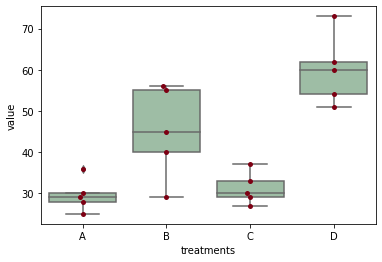

In [67]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [69]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.6392411462109217e-05


In [70]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [71]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [72]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

c:\Users\maula\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
c:\Users\maula\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
c:\Users\maula\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:421: FutureWarning: The defa

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


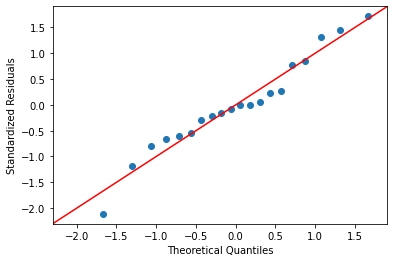

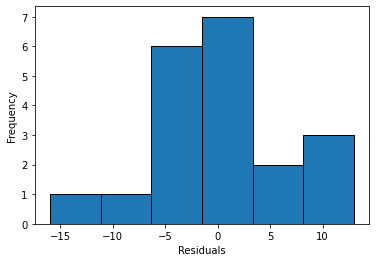

In [73]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [74]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9685018062591553 0.7229723930358887


In [75]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.9220
1,Degrees of freedom (Df),3.0000
2,p value,0.1667


In [77]:
import scipy.stats as stats

# Contoh data untuk tiga kelompok
group1 = [68, 72, 65, 74, 70]
group2 = [58, 63, 60, 62, 59]
group3 = [78, 83, 80, 85, 82]

# Melakukan uji Levene
statistic, p_value = stats.levene(df['A'], df['B'], df['C'], df['D'])

print("Levene Statistic:", statistic)
print("p-value:", p_value)


Levene Statistic: 1.9219593192195938
p-value: 0.16673281219949274


In [79]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [92]:
df = pd.read_excel("data/Telco_customer_churn_adapted_v2.xlsx")

product = "Games Product"
cltv = "CLTV (Predicted Thou. IDR)"

groups = dict()
labels = list()
for key in df[product].unique():
    groups[key] = df[df[product] == key][cltv].values
    labels.extend([key]*len(groups[key]))
data = np.concatenate(list(groups.values()))

# ANOVA one-way
f_statistic, p_value = stats.f_oneway(*groups.values())

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 73.63094690961177
p-value: 2.250841766984456e-32


In [93]:
# Buat model ANOVA dengan statsmodels
model = ols('data ~ C(labels)', data={'data': data, 'labels': labels}).fit()

# Lakukan uji post hoc Tukey's HSD
posthoc = sm.stats.multicomp.MultiComparison(data, labels)
result = posthoc.tukeyhsd()
print(result)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------
                 No No internet service   145.34 0.0053  35.8569 254.8231   True
                 No                 Yes 514.6628    0.0 414.9196 614.4059   True
No internet service                 Yes 369.3228    0.0 248.2707 490.3748   True
--------------------------------------------------------------------------------


In [112]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

df = pd.read_excel("data/Telco_customer_churn_adapted_v2.xlsx")

product = "Video Product"
cltv = "CLTV (Predicted Thou. IDR)"
cltv = "Monthly Purchase (Thou. IDR)"

groups = dict()
labels = list()
for key in df[product].unique():
    groups[key] = df[df[product] == key][cltv].values
    labels.extend([key]*len(groups[key]))
data = np.concatenate(list(groups.values()))

# Uji asumsi normalitas
normality_test = stats.shapiro(data)
w, p_value = normality_test

print("Shapiro-Wilk Normality Test:")
print("W-statistic:", w)
print("p-value:", p_value)

# Uji homoskedastisitas (Levene's test)
homoskedasticity_test = stats.levene(*groups.values())
levene_statistic, levene_p_value = homoskedasticity_test

print("\nLevene's Test for Homoskedasticity:")
print("Levene Statistic:", levene_statistic)
print("p-value:", levene_p_value)

# Memeriksa asumsi dan memilih uji statistik yang sesuai
if p_value > 0.05 and levene_p_value > 0.05:
    # Asumsi normalitas dan homoskedastisitas terpenuhi, gunakan One-Way ANOVA
    f_statistic, anova_p_value = stats.f_oneway(*groups.values())
    print("\nOne-Way ANOVA:")
    print("F-statistic:", f_statistic)
    print("p-value:", anova_p_value)

    # Lakukan uji post hoc jika diperlukan (misalnya, Tukey's HSD)
    if anova_p_value < 0.05:
        posthoc = sm.stats.multicomp.MultiComparison(data, labels)
        result = posthoc.tukeyhsd()
        print("\nTukey's HSD Post Hoc Test:")
        print(result)
    else:
        print("Tidak ada perluan uji post hoc.")
else:
    # Salah satu asumsi tidak terpenuhi, gunakan Kruskal-Wallis
    kruskal_statistic, kruskal_p_value = stats.kruskal(*groups.values())
    print("\nKruskal-Wallis Test:")
    print("Kruskal Statistic:", kruskal_statistic)
    print("p-value:", kruskal_p_value)

Shapiro-Wilk Normality Test:
W-statistic: 0.9208890199661255
p-value: 0.0

Levene's Test for Homoskedasticity:
Levene Statistic: 1040.4697718669986
p-value: 0.0

Kruskal-Wallis Test:
Kruskal Statistic: 4587.7000906772855
p-value: 0.0


c:\Users\maula\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


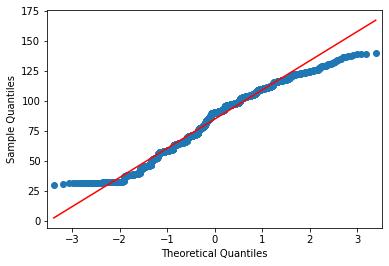

In [115]:
import statsmodels.api as sm
import pylab

# Data contoh
# data = np.random.normal(0, 1, 1000)

# Buat plot probabilitas normal
sm.qqplot(groups["No"], line='s')
pylab.show()

In [129]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp
import statsmodels.api as sm

df = pd.read_excel("data/Telco_customer_churn_adapted_v2.xlsx")

product = "Video Product"
cltv = "Monthly Purchase (Thou. IDR)"

groups = dict()
labels = list()
for key in df[product].unique():
    groups[key] = df[df[product] == key][cltv].values
    labels.extend([key]*len(groups[key]))
data = np.concatenate(list(groups.values()))

# Uji asumsi normalitas
normality_test = stats.shapiro(data)
w, p_value = normality_test

print("Shapiro-Wilk Normality Test:")
print("W-statistic:", w)
print("p-value:", p_value)

# Uji homoskedastisitas (Levene's test)
homoskedasticity_test = stats.levene(*groups.values())
levene_statistic, levene_p_value = homoskedasticity_test

print("\nLevene's Test for Homoskedasticity:")
print("Levene Statistic:", levene_statistic)
print("p-value:", levene_p_value)

# Memeriksa asumsi dan memilih uji statistik yang sesuai
if p_value > 0.05 and levene_p_value > 0.05:
    # Asumsi normalitas dan homoskedastisitas terpenuhi, gunakan One-Way ANOVA
    f_statistic, anova_p_value = stats.f_oneway(*groups.values())
    print("\nOne-Way ANOVA:")
    print("F-statistic:", f_statistic)
    print("p-value:", anova_p_value)

    # Lakukan uji post hoc jika diperlukan (misalnya, Tukey's HSD)
    if anova_p_value < 0.05:
        posthoc = sm.stats.multicomp.MultiComparison(data, labels)
        result = posthoc.tukeyhsd()
        print("\nTukey's HSD Post Hoc Test:")
        print(result)
    else:
        print("Tidak ada perluan uji post hoc.")
else:
    # Salah satu asumsi tidak terpenuhi, gunakan Kruskal-Wallis
    kruskal_statistic, kruskal_p_value = stats.kruskal(*groups.values())
    print("\nKruskal-Wallis Test:")
    print("Kruskal Statistic:", kruskal_statistic)
    print("p-value:", kruskal_p_value)

    # Lakukan uji post hoc Dunn setelah Kruskal-Wallis
    if kruskal_p_value < 0.05:
        posthoc_res = sp.posthoc_dunn(list(groups.values()), p_adjust = 'holm')
        print("\nDunn Post Hoc Test (after Kruskal-Wallis):")
        print(round(posthoc_res, 5))


c:\Users\maula\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Normality Test:
W-statistic: 0.9208890199661255
p-value: 0.0

Levene's Test for Homoskedasticity:
Levene Statistic: 1040.4697718669986
p-value: 0.0

Kruskal-Wallis Test:
Kruskal Statistic: 4587.7000906772855
p-value: 0.0

Dunn Post Hoc Test (after Kruskal-Wallis):
     1    2    3
1  1.0  0.0  0.0
2  0.0  1.0  0.0
3  0.0  0.0  1.0


In [153]:
product = "Video Product"
cltv = "Monthly Purchase (Thou. IDR)"

def check_for_anova_assumptions(product):
    import warnings
    warnings.filterwarnings("ignore")

    groups = dict()
    labels = list()
    for key in df[product].unique():
        groups[key] = df[df[product] == key][cltv].values
        labels.extend([key]*len(groups[key]))
    data = np.concatenate(list(groups.values()))

    # Normality test
    normality_test = stats.shapiro(data)
    # Uji homoskedastisitas (Levene's test)
    homoskedasticity_test = stats.levene(*groups.values())

    return pd.DataFrame({
        "Normality" : ["❌" if normality_test.pvalue < 0.05 else "✅"],
        "Homoscedasticity" : ["❌" if homoskedasticity_test.pvalue < 0.05 else "✅"],
    })

In [154]:
assumptions = check_for_anova_assumptions("Video Product")
assumptions.iloc[0].values 

array(['❌', '❌'], dtype=object)

In [162]:
def anova(product):
    groups = dict()
    labels = list()
    for key in df[product].unique():
        groups[key] = df[df[product] == key][cltv].values
        labels.extend([key]*len(groups[key]))
    data = np.concatenate(list(groups.values()))

    # Asumsi normalitas dan homoskedastisitas terpenuhi, gunakan One-Way ANOVA
    f_statistic, anova_p_value = stats.f_oneway(*groups.values())

    # Lakukan uji post hoc jika diperlukan (misalnya, Tukey's HSD)
    if anova_p_value < 0.05:
        posthoc = sm.stats.multicomp.MultiComparison(data, labels)
        posthoc_result = posthoc.tukeyhsd()
    else:
        posthoc_result = None

    return f_statistic, anova_p_value, posthoc_result

In [163]:
def kruskal_wallis(product):
    groups = dict()
    labels = list()
    for key in df[product].unique():
        groups[key] = df[df[product] == key][cltv].values
        labels.extend([key]*len(groups[key]))
    data = np.concatenate(list(groups.values()))
    kruskal_statistic, kruskal_p_value = stats.kruskal(*groups.values())

    return kruskal_statistic, kruskal_p_value, None

In [174]:
def cltv_hypothesis_testing(product):
    assumptions = check_for_anova_assumptions(product)

    if "❌" in assumptions.iloc[0].values:
        statistic, pvalue, posthoc_result = kruskal_wallis(product)
    else:
        statistic, pvalue, posthoc_result = anova(product)

    return assumptions, statistic, pvalue, posthoc_result